In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
file_path = '/content/drive/MyDrive/종합설계/중구 상권코드.xlsx'
df = pd.read_excel(file_path)
area_df = df[df['상권_구분_코드_명'].isin(['골목상권', '발달상권'])]

In [4]:
area_codes = area_df['상권_코드'].unique().tolist()

In [5]:
file_path = '/content/drive/MyDrive/종합설계/상권_길단위인구.csv'
df = pd.read_csv(file_path, usecols=['기준_년분기_코드','상권_코드', '총_유동인구_수'], encoding='CP949')
filtered_df= df[df['상권_코드'].isin(area_codes)]
movenum = filtered_df[filtered_df['기준_년분기_코드'] == 20233]
movenum

,기준_년분기_코드,상권_코드,총_유동인구_수
517,20233,3120043,997293
521,20233,3120039,2205437
522,20233,3120038,1017724
523,20233,3120037,3425687
524,20233,3120036,319443
525,20233,3120035,619608
526,20233,3120034,767060
527,20233,3120033,730291
528,20233,3120032,1637726
529,20233,3120031,2255168


In [6]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_상주인구.csv'

df_2 = pd.read_csv(file_path_2, encoding='CP949')

filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','총_상주인구_수']]
living = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
living

,상권_코드,상권_코드_명,기준_년분기_코드,총_상주인구_수
24666,3110591,충정로역 6번,20233,2504
25181,3120018,중림동,20233,1598
25182,3120019,경찰청앞교차로,20233,258
25183,3120020,시청역_1번,20233,18
25184,3120021,시청역_8번,20233,18
25185,3120022,북창동(시청역_6번),20233,240
25186,3120023,서울시청,20233,17
25187,3120024,회현역,20233,1741
25188,3120026,을지로입구역,20233,73
25189,3120027,명동역(명동재미로),20233,1307


In [7]:
# filtered_df2_20233와 filtered_df_20233을 '상권_코드'를 기준으로 merge
merged_df = pd.merge(movenum, living, on='상권_코드', how='inner')
merged_df


,기준_년분기_코드_x,상권_코드,총_유동인구_수,상권_코드_명,기준_년분기_코드_y,총_상주인구_수
0,20233,3120043,997293,서울역,20233,1032
1,20233,3120039,2205437,신당역,20233,2615
2,20233,3120038,1017724,약수역,20233,2438
3,20233,3120037,3425687,동대문역사문화공원역,20233,2146
4,20233,3120036,319443,장충동족발거리(남소영길),20233,267
5,20233,3120035,619608,퇴계로5가,20233,271
6,20233,3120034,767060,중구청(퇴계로4가),20233,988
7,20233,3120033,730291,을지로4가역,20233,106
8,20233,3120032,1637726,충무로역,20233,2496
9,20233,3120031,2255168,을지로3가역,20233,507


In [8]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_소득소비.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','월_평균_소득_금액']]
money = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
money

,상권_코드,상권_코드_명,기준_년분기_코드,월_평균_소득_금액
3280,3110038,경향신문사,20233,1554706.0
3281,3110039,회현역 1번,20233,1988593.0
3282,3110040,중구회현체육센터(정화예술대남산캠퍼스),20233,2645687.0
3283,3110041,남산케이블카,20233,2435163.0
3284,3110042,남산골공원옆,20233,3232386.0
3285,3110043,충무초등학교,20233,2824585.0
3286,3110044,관성묘,20233,2847641.0
3287,3110045,동대문역사문화공원역 5번,20233,2461667.0
3288,3110046,버티고개,20233,2405645.0
3289,3110047,다산성곽길,20233,2759072.0


In [9]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_아파트.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','아파트_단지_수']]
house = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
house

,상권_코드,상권_코드_명,기준_년분기_코드,아파트_단지_수
107,3110057,황학코아루아파트,20233,6
119,3110040,중구회현체육센터(정화예술대남산캠퍼스),20233,6
122,3110041,남산케이블카,20233,3
125,3110042,남산골공원옆,20233,13
128,3110043,충무초등학교,20233,114
131,3110044,관성묘,20233,4
134,3110045,동대문역사문화공원역 5번,20233,4
137,3110046,버티고개,20233,147
140,3110047,다산성곽길,20233,57
143,3110048,장충동주민센터,20233,43


In [10]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_아파트평균시가.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','아파트_평균_시가']]
house_price = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
house_price

,상권_코드,상권_코드_명,기준_년분기_코드,아파트_평균_시가
107,3110057,황학코아루아파트,20233,264406566
119,3110040,중구회현체육센터(정화예술대남산캠퍼스),20233,216179630
122,3110041,남산케이블카,20233,196253968
125,3110042,남산골공원옆,20233,193920549
128,3110043,충무초등학교,20233,118149882
131,3110044,관성묘,20233,148518182
134,3110045,동대문역사문화공원역 5번,20233,161539583
137,3110046,버티고개,20233,125528923
140,3110047,다산성곽길,20233,229870672
143,3110048,장충동주민센터,20233,379131179


In [11]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_점포수.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','서비스_업종_코드_명','점포_수']]
howmanyaround = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20224]
howmanyaround

,상권_코드,상권_코드_명,기준_년분기_코드,서비스_업종_코드_명,점포_수
228715,3110054,청구역 3번,20224,화장품,6
228742,3110054,청구역 3번,20224,가구,2
228760,3110041,남산케이블카,20224,네일숍,2
228803,3120019,경찰청앞교차로,20224,편의점,1
228890,3120026,을지로입구역,20224,네일숍,2
...,...,...,...,...,...
304363,3110591,충정로역 6번,20224,독서실,1
304529,3110050,약수역 7번,20224,패스트푸드점,0
304608,3120024,회현역,20224,미용재료,2
304646,3120026,을지로입구역,20224,복권방,1


In [12]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_직장인구.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','총_직장_인구_수']]
workers = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
workers

,상권_코드,상권_코드_명,기준_년분기_코드,총_직장_인구_수
26020,3110056,신당역 3번,20233,514
26021,3120027,명동역(명동재미로),20233,18097
26023,3110050,약수역 7번,20233,306
26024,3110042,남산골공원옆,20233,683
26218,3110049,장충단 고개,20233,2303
26219,3120039,신당역,20233,2348
26220,3110041,남산케이블카,20233,967
26222,3120036,장충동족발거리(남소영길),20233,2289
26223,3110054,청구역 3번,20233,1542
26410,3120032,충무로역,20233,10818


In [13]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_집객시설.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','집객시설_수']]
gather = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20233]
gather

,상권_코드,상권_코드_명,기준_년분기_코드,집객시설_수
70,3110038,경향신문사,20233,10
73,3110039,회현역 1번,20233,5
118,3110057,황학코아루아파트,20233,14
130,3110040,중구회현체육센터(정화예술대남산캠퍼스),20233,10
133,3110041,남산케이블카,20233,12
136,3110042,남산골공원옆,20233,3
139,3110043,충무초등학교,20233,19
142,3110045,동대문역사문화공원역 5번,20233,8
145,3110047,다산성곽길,20233,5
148,3110048,장충동주민센터,20233,12


In [14]:
file_path_2 = '/content/drive/MyDrive/종합설계/상권_추정매출.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
filtered_df_2 = df_2[df_2['상권_코드'].isin(area_codes)][['상권_코드','상권_코드_명' ,'기준_년분기_코드','당월_매출_금액']]
target = filtered_df_2[filtered_df_2['기준_년분기_코드'] == 20224]
target

,상권_코드,상권_코드_명,기준_년분기_코드,당월_매출_금액
62665,3120025,롯데백화점(시청광장 지하쇼핑센터),20224,432204389
62738,3120021,시청역_8번,20224,390434971
62739,3120028,명동(명동거리),20224,2662173831
62772,3120032,충무로역,20224,1205959592
62802,3120027,명동역(명동재미로),20224,861444614
...,...,...,...,...
83556,3120027,명동역(명동재미로),20224,4414448699
83557,3120030,중부경찰서(영화인의거리),20224,5412133030
83563,3120024,회현역,20224,663360129
83565,3110591,충정로역 6번,20224,23208485


In [15]:
target_df = target.groupby('상권_코드')['당월_매출_금액'].sum().reset_index()
target_df

,상권_코드,당월_매출_금액
0,3110038,3081820833
1,3110039,190429155
2,3110040,1013088916
3,3110041,5344948687
4,3110042,662665418
5,3110043,4091110752
6,3110044,457108553
7,3110045,2789367738
8,3110046,45000000
9,3110047,704534994


In [16]:
file_path_2 = '/content/drive/MyDrive/종합설계/중구_일반음식점.csv'
df_2 = pd.read_csv(file_path_2, encoding='CP949')
df_2

<ipython-input-16-f1bbdf663102>:2: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(file_path_2, encoding='CP949')


,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3010000,3010000-101-1900-11278,19001010,NaN,3,폐업,2,폐업,19910605,NaN,...,NaN,NaN,NaN,NaN,NaN,N,0.00,NaN,NaN,NaN
1,3010000,3010000-101-1904-03571,19040808,NaN,3,폐업,2,폐업,19930504,NaN,...,NaN,NaN,NaN,NaN,NaN,N,21.90,NaN,NaN,NaN
2,3010000,3010000-101-1904-06559,19040808,NaN,3,폐업,2,폐업,19910605,NaN,...,NaN,NaN,NaN,NaN,NaN,N,0.00,NaN,NaN,NaN
3,3010000,3010000-101-1904-08999,19040808,NaN,3,폐업,2,폐업,19931108,NaN,...,NaN,NaN,NaN,NaN,NaN,N,45.00,NaN,NaN,NaN
4,3010000,3010000-101-1904-09693,19040808,NaN,3,폐업,2,폐업,19900309,NaN,...,NaN,NaN,NaN,NaN,NaN,N,58.94,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20998,3010000,3010000-101-2024-00112,2024-03-20,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20999,3010000,3010000-101-2024-00113,2024-03-21,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21000,3010000,3010000-101-2024-00114,2024-03-21,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21001,3010000,3010000-101-2024-00115,2024-03-25,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:

from functools import reduce

dataframes = [target_df, gather, workers, house_price, house, money, merged_df]

final_merged_df = reduce(lambda left, right: pd.merge(left, right, on='상권_코드', how='inner'), dataframes)
final_merged_df


<ipython-input-17-844cb4e27b42>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'기준_년분기_코드_x', '상권_코드_명_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_merged_df = reduce(lambda left, right: pd.merge(left, right, on='상권_코드', how='inner'), dataframes)
<ipython-input-17-844cb4e27b42>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'상권_코드_명_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_merged_df = reduce(lambda left, right: pd.merge(left, right, on='상권_코드', how='inner'), dataframes)


,상권_코드,당월_매출_금액,상권_코드_명_x,기준_년분기_코드_x_x,집객시설_수,상권_코드_명_y,기준_년분기_코드_y_x,총_직장_인구_수,상권_코드_명_x,기준_년분기_코드_x_x,...,기준_년분기_코드_y_x,아파트_단지_수,상권_코드_명_x,기준_년분기_코드,월_평균_소득_금액,기준_년분기_코드_x_y,총_유동인구_수,상권_코드_명_y,기준_년분기_코드_y_y,총_상주인구_수
0,3110040,1013088916,중구회현체육센터(정화예술대남산캠퍼스),20233,10,중구회현체육센터(정화예술대남산캠퍼스),20233,165,중구회현체육센터(정화예술대남산캠퍼스),20233,...,20233,6,중구회현체육센터(정화예술대남산캠퍼스),20233,2645687.0,20233,162045,중구회현체육센터(정화예술대남산캠퍼스),20233,1084
1,3110041,5344948687,남산케이블카,20233,12,남산케이블카,20233,967,남산케이블카,20233,...,20233,3,남산케이블카,20233,2435163.0,20233,308603,남산케이블카,20233,765
2,3110042,662665418,남산골공원옆,20233,3,남산골공원옆,20233,683,남산골공원옆,20233,...,20233,13,남산골공원옆,20233,3232386.0,20233,181322,남산골공원옆,20233,934
3,3110043,4091110752,충무초등학교,20233,19,충무초등학교,20233,1202,충무초등학교,20233,...,20233,114,충무초등학교,20233,2824585.0,20233,757621,충무초등학교,20233,2059
4,3110045,2789367738,동대문역사문화공원역 5번,20233,8,동대문역사문화공원역 5번,20233,234,동대문역사문화공원역 5번,20233,...,20233,4,동대문역사문화공원역 5번,20233,2461667.0,20233,663842,동대문역사문화공원역 5번,20233,999
5,3110047,704534994,다산성곽길,20233,5,다산성곽길,20233,160,다산성곽길,20233,...,20233,57,다산성곽길,20233,2759072.0,20233,586191,다산성곽길,20233,3006
6,3110048,2079439532,장충동주민센터,20233,12,장충동주민센터,20233,5315,장충동주민센터,20233,...,20233,43,장충동주민센터,20233,2981152.0,20233,920316,장충동주민센터,20233,2658
7,3110049,3899048033,장충단 고개,20233,6,장충단 고개,20233,2303,장충단 고개,20233,...,20233,45,장충단 고개,20233,2908231.0,20233,630665,장충단 고개,20233,2063
8,3110050,1229580723,약수역 7번,20233,14,약수역 7번,20233,306,약수역 7번,20233,...,20233,13,약수역 7번,20233,2710670.0,20233,449312,약수역 7번,20233,850
9,3110051,337403495,한양공고앞 교차로,20233,2,한양공고앞 교차로,20233,111,한양공고앞 교차로,20233,...,20233,10,한양공고앞 교차로,20233,2461144.0,20233,950458,한양공고앞 교차로,20233,1236


In [18]:
selected_columns_df = final_merged_df[['월_평균_소득_금액', '총_상주인구_수', '총_유동인구_수', '아파트_단지_수', '아파트_평균_시가', '총_직장_인구_수', '집객시설_수', '당월_매출_금액']]
selected_columns_df

,월_평균_소득_금액,총_상주인구_수,총_유동인구_수,아파트_단지_수,아파트_평균_시가,총_직장_인구_수,집객시설_수,당월_매출_금액
0,2645687.0,1084,162045,6,216179630,165,10,1013088916
1,2435163.0,765,308603,3,196253968,967,12,5344948687
2,3232386.0,934,181322,13,193920549,683,3,662665418
3,2824585.0,2059,757621,114,118149882,1202,19,4091110752
4,2461667.0,999,663842,4,161539583,234,8,2789367738
5,2759072.0,3006,586191,57,229870672,160,5,704534994
6,2981152.0,2658,920316,43,379131179,5315,12,2079439532
7,2908231.0,2063,630665,45,270887710,2303,6,3899048033
8,2710670.0,850,449312,13,194157111,306,14,1229580723
9,2461144.0,1236,950458,10,223503864,111,2,337403495


In [19]:
! pip install shap
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


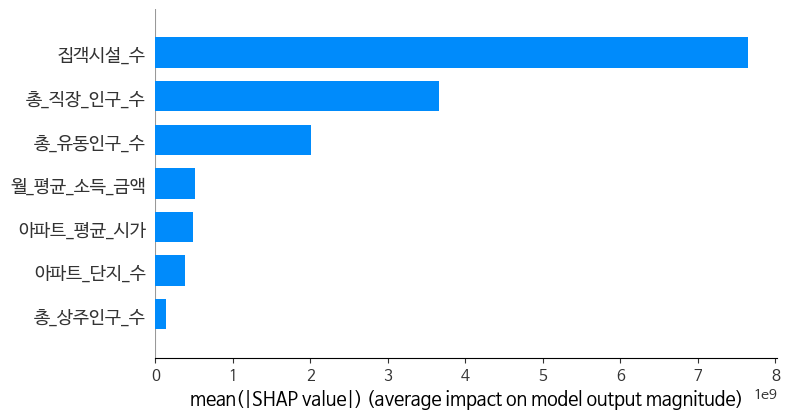

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

X = selected_columns_df.drop('당월_매출_금액', axis=1)
y = selected_columns_df['당월_매출_금액']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


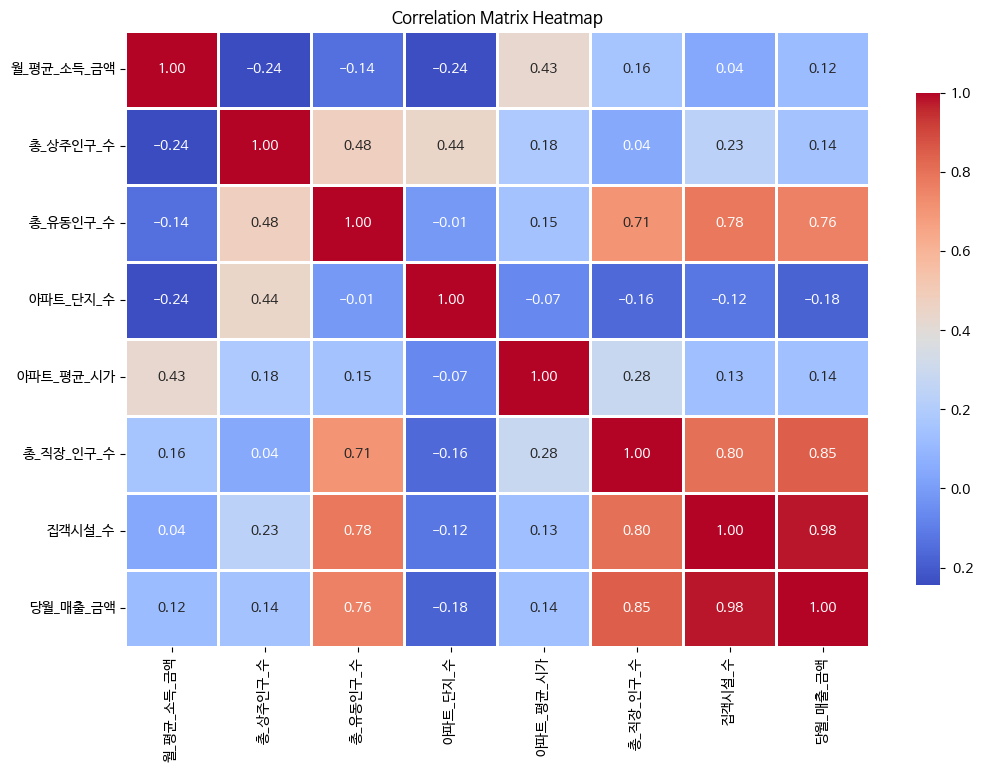

In [22]:
import seaborn as sns

correlation_matrix = selected_columns_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


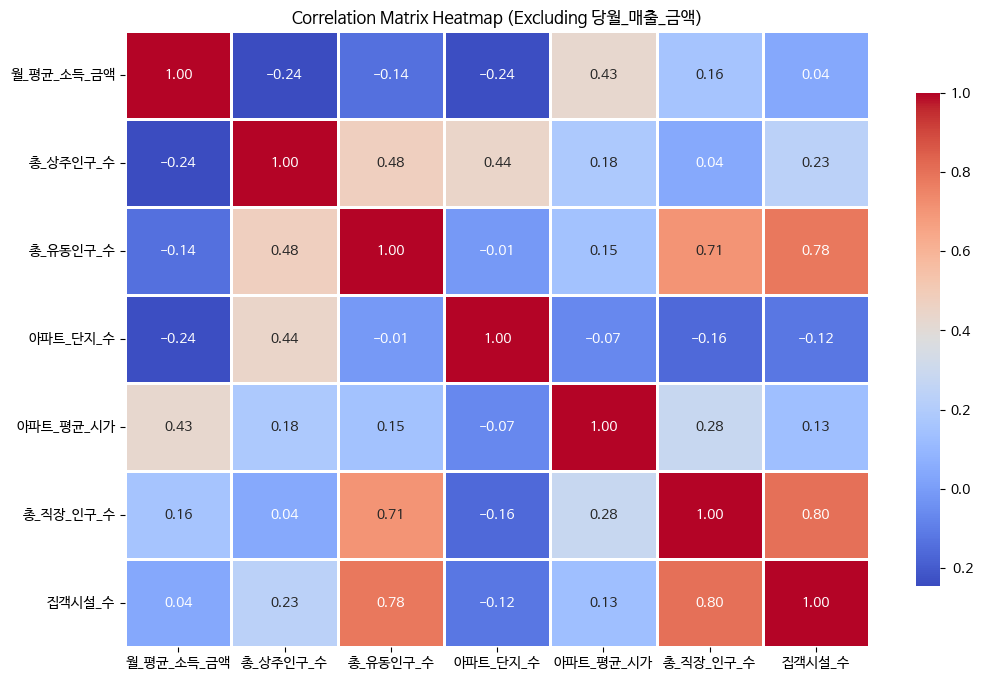

In [25]:
correlation_matrix_without_sales = selected_columns_df.drop('당월_매출_금액', axis=1).corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_without_sales, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap (Excluding 당월_매출_금액)')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


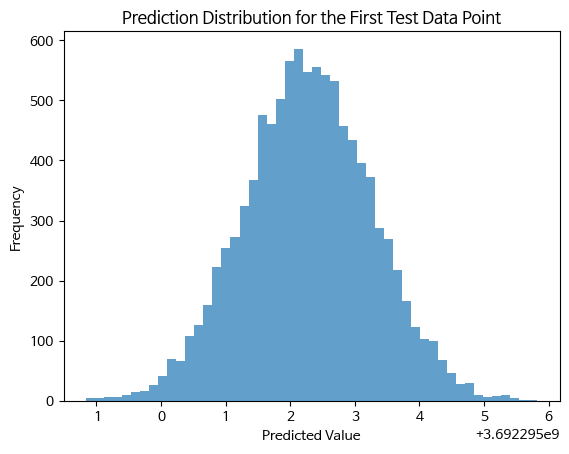

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = selected_columns_df.drop('당월_매출_금액', axis=1).values
y = selected_columns_df['당월_매출_금액'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

n_simulations = 10000
test_predictions = np.zeros((n_simulations, len(X_test)))

for i in range(n_simulations):
    test_predictions[i, :] = model.predict(X_test) + np.random.normal(0, 1, len(X_test))  # 예측에 노이즈 추가

mean_prediction = test_predictions.mean(axis=0)
std_prediction = test_predictions.std(axis=0)

import matplotlib.pyplot as plt

plt.hist(test_predictions[:, 0], bins=50, alpha=0.7)
plt.title("Prediction Distribution for the First Test Data Point")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()
